# Imports

In [41]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.decomposition import PCA

# Data Preparation

In [3]:
# Config used to generate sample sales data
CORR = 0.9
MU = 1.05
SIGMA = 0.1
START_CHOC = 5
START_VAN = 4

In [4]:
# Generate sales and growth rates for 20 periods
# using a multivariate normal distribution
cov_matrix = [[(SIGMA**2), CORR*(SIGMA**2)], 
              [CORR*(SIGMA**2), (SIGMA**2)]]

distribution = ss.multivariate_normal(
    mean=[MU, MU], cov=cov_matrix)

sample_data = distribution.rvs(20, random_state=5)

chocolate_growth = sample_data[:, 0]
vanilla_growth = sample_data[:, 1]

chocolate_sales = np.cumprod([START_CHOC] + list(chocolate_growth))
vanilla_sales = np.cumprod([START_VAN] + list(vanilla_growth))

In [5]:
# Prepare dataframes
growth_df = pd.DataFrame(data={
    "Growth Rate - Chocolate": chocolate_growth,
    "Growth Rate - Vanilla": vanilla_growth})

sales_df = pd.DataFrame(data={
    "Sales Chocolate (USD mln)": chocolate_sales,
    "Sales Vanilla (USD mln)": vanilla_sales})

df = pd.concat([growth_df, sales_df], axis=1)
df

,Growth Rate - Chocolate,Growth Rate - Vanilla,Sales Chocolate (USD mln),Sales Vanilla (USD mln)
0,1.014393,0.999596,5.000000,4.000000
1,0.818715,0.807441,5.071965,3.998384
2,1.003931,1.074702,4.152492,3.228458
3,1.151850,1.125392,4.168816,3.469630
4,1.039091,1.024339,4.801853,3.904693
5,1.170837,1.161675,4.989561,3.999727
6,1.071480,1.098468,5.841965,4.646384
7,1.227920,1.196607,6.259551,5.103906
8,0.896245,0.979307,7.686227,6.107369
9,1.182872,1.211711,6.888744,5.980993


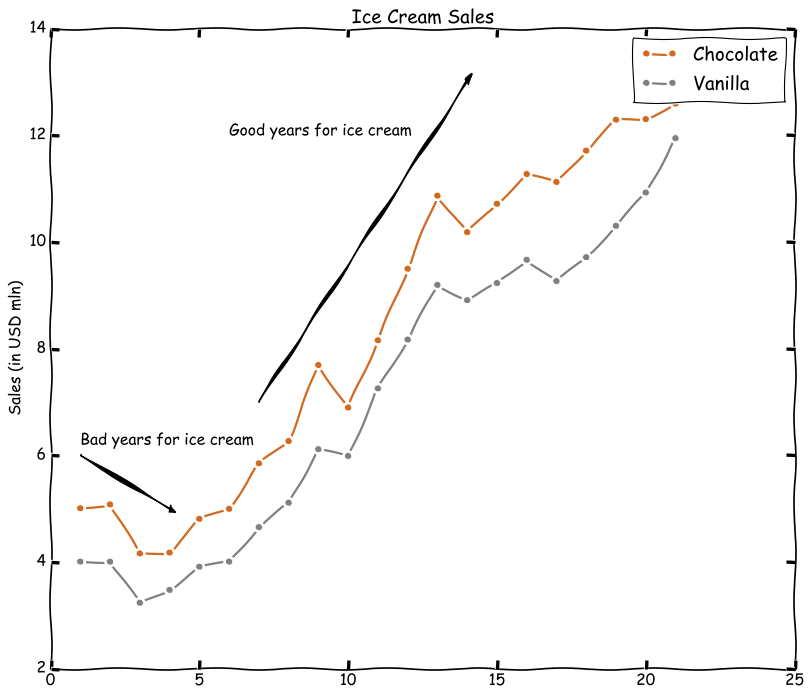

In [17]:
# Illustrative plot of correlation in sales
plt.style.use("classic")

plt.xkcd()

plt.figure(figsize=(12, 10))

sns.lineplot(x=range(1, 22),
             y=sales_df["Sales Chocolate (USD mln)"],
             color="chocolate",
             marker="o"
            )

sns.lineplot(x=range(1, 22),
             y=sales_df["Sales Vanilla (USD mln)"],
             color="grey",
             marker="o"
            )

plt.legend(["Chocolate", "Vanilla"])

plt.title("Ice Cream Sales")

plt.ylabel("Sales (in USD mln)")

plt.arrow(1, 6, 3, -1, width=0.05, color="black")
plt.arrow(7, 7, 7, 6, width=0.05, color="black")

plt.annotate("Bad years for ice cream", (1, 6.2))
plt.annotate("Good years for ice cream", (6, 12))


plt.show()

In [6]:
final_chocolate = df["Sales Chocolate (USD mln)"].iloc[-1]
final_vanilla = df["Sales Vanilla (USD mln)"].iloc[-1]

print(f"""Last year's sales (in USD mln):
\nChocolate: {round(final_chocolate, 2)}
Vanilla: {round(final_vanilla, 2)}
\nTotal: {round(final_vanilla + final_chocolate, 2)}""")

Last year's sales (in USD mln):

Chocolate: 12.59
Vanilla: 11.94

Total: 24.53


# Check: Vanilla > Chocolate

In [7]:
def exceed_check(growth_vanilla, growth_chocolate):
    '''This function takes sample growth rates for
    vanilla and chocolate ice cream sales and checks
    if vanilla ice cream sales would exceed chocolate
    given the combination of growth rates.
    
    Args:
    growth_vanilla (list): growth rates for vanilla sales
    growth_chocolate (list): growth rates for chocolate sales
    
    Returns:
    flags_list (list): A list of True/False flags indicating
        whether vanilla sales exceeds chocolate sales for the
        given combination of growth rates
    mean_pass_rate: Mean value of flags_list indicating the 
        probability vanilla sales exceeds chocolates given the 
        combination of growth rates
    '''
    # Last year's chocolate and vanilla ice cream sales
    # set as constants to improve performance
    FINAL_CHOCOLATE = 12.59
    FINAL_VANILLA = 11.94
    
    flags_list = [v*FINAL_VANILLA > c*FINAL_CHOCOLATE 
        for v,c in zip(growth_vanilla, growth_chocolate)]
    
    mean_pass_rate = np.mean(flags_list)
    
    return flags_list, mean_pass_rate

# Wrong 1

In [199]:
# Estimate means
mean_choc = np.mean(df["Growth Rate - Chocolate"])
print(f"Mean (Chocolate): {mean_choc}")

mean_van = np.mean(df["Growth Rate - Vanilla"])
print(f"Mean (Vanilla): {mean_van}")

# Estimate standard deviations
std_choc = np.std(df["Growth Rate - Chocolate"],
                 ddof=1)
print(f"StDev (Chocolate): {std_choc}")

std_van = np.std(df["Growth Rate - Vanilla"],
                ddof=1)
print(f"StDev (Vanilla): {std_van}")

# Define normal distributions
distribution_choc = ss.norm(mean_choc, std_choc)

distribution_van = ss.norm(mean_van, std_van)

Mean (Chocolate): 1.0520754233796565
Mean (Vanilla): 1.0602491125970805
StDev (Chocolate): 0.10189948584349691
StDev (Vanilla): 0.09247888186321666


In [9]:
growth_vanilla = distribution_choc.rvs(1000, 
    random_state=1)

growth_chocolate = distribution_van.rvs(1000, 
    random_state=2)

In [10]:
exceed_check(growth_vanilla, growth_chocolate)[1]

0.341

# Wrong 2

In [11]:
growth_vanilla = df["Growth Rate - Vanilla"].dropna(
    ).sample(1000, replace=True, random_state=1)

growth_chocolate = df["Growth Rate - Chocolate"].dropna(
    ).sample(1000, replace=True, random_state=2)

In [12]:
exceed_check(growth_vanilla, growth_chocolate)[1]

0.359

# Method 1

In [13]:
corr = df.corr().iloc[0, 1]
corr

0.9293946133516929

In [14]:
# We need to recalculate the covariance matrix
# using the estimated paramaters
cov_matrix = [[std_choc**2, corr*std_choc*std_van], 
              [corr*std_choc*std_van, std_van**2]]

growth_rates = ss.multivariate_normal(
    mean=[mean_choc, mean_van],
    cov=cov_matrix).rvs(1000, random_state=1)

growth_chocolate = growth_rates[:, 0]
growth_vanilla = growth_rates[:, 1]

In [15]:
exceed_check(growth_vanilla, growth_chocolate)[1]

0.113

# Method 2

In [24]:
corr = ss.kendalltau(
    df.dropna().iloc[:, 0], df.dropna().iloc[:, 1])[0]

corr

0.7368421052631579

In [25]:
# We have already calculated corr in the previous section 
# we set variances to 1 because the covariance matrix we 
# are constructing will be used with a multivariate normal 
# distribution of means 0 and std 1 to derive a copula
cov_matrix = [[1, corr], 
              [corr, 1]]

# We will draw 1000 combinations from the distribution
random_vals = ss.multivariate_normal(cov=cov_matrix).rvs(
    1000, random_state=1)

# Finally a cumulative density function for a distribution
# ranges between 0 to 1 so it will be used to convert the
# drawn samples to the values we need for our copula
copula = ss.norm.cdf(random_vals)
print(copula.shape)
copula

(1000, 2)


array([[0.06937355, 0.04359977],
       [0.76434993, 0.62444074],
       [0.33813501, 0.09984573],
       ...,
       [0.65691972, 0.68258394],
       [0.35280537, 0.23450255],
       [0.18501526, 0.35372813]])

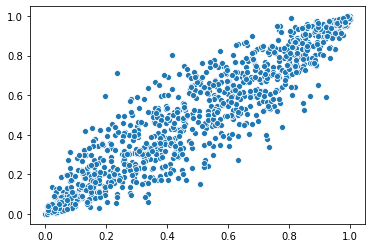

In [26]:
sns.scatterplot(x=copula[:, 0], y=copula[:, 1])

In [20]:
df.iloc[:, 0]

0     1.014393
1     0.818715
2     1.003931
3     1.151850
4     1.039091
5     1.170837
6     1.071480
7     1.227920
8     0.896245
9     1.182872
10    1.164738
11    1.144428
12    0.936949
13    1.052359
14    1.052048
15    0.986825
16    1.052864
17    1.049526
18    1.000886
19    1.023551
20         NaN
Name: Growth Rate - Chocolate, dtype: float64

In [28]:
# distribution_choc and distribution_van area already
# calculated in previous sections
growth_chocolate = distribution_choc.ppf(copula[:, 0])
growth_vanilla = distribution_van.ppf(copula[:, 1])

In [29]:
exceed_check(growth_vanilla, growth_chocolate)[1]

0.111

# Method 3

In [40]:
resampled_history = df[["Growth Rate - Chocolate", 
    "Growth Rate - Vanilla"]].dropna(
    ).sample(1000, replace=True, random_state=1)

growth_chocolate = resampled_history["Growth Rate - Chocolate"]
growth_vanilla = resampled_history["Growth Rate - Vanilla"]

exceed_check(growth_vanilla, growth_chocolate)[1]

0.21

In [39]:
growth_chocolate

5     1.170837
11    1.144428
12    0.936949
8     0.896245
9     1.182872
        ...   
0     1.014393
8     0.896245
8     0.896245
14    1.052048
4     1.039091
Name: Growth Rate - Chocolate, Length: 1000, dtype: float64

# Method 4

In [69]:
pca = PCA(n_components=2)

# Normalize chocolate and vanilla growth rates to apply PCA
normalized_chocolate = (
    df["Growth Rate - Chocolate"].dropna() - mean_choc
) / std_choc

normalized_vanilla = (
    df["Growth Rate - Vanilla"].dropna() - mean_van
) / std_van

# Apply PCA transformation on normalized values
components = pca.fit_transform(
    np.array([normalized_chocolate, 
    normalized_vanilla]).T)

components

array([[ 0.72525094, -0.2022741 ],
       [ 3.55235903, -0.31365844],
       [ 0.22357702,  0.44459331],
       [-1.19045324, -0.19427543],
       [ 0.36468059, -0.18447352],
       [-1.59963849, -0.04860268],
       [-0.42688513,  0.15757447],
       [-2.26284298, -0.17761856],
       [ 1.70023814,  0.46245534],
       [-2.06573117,  0.25046424],
       [-1.28772914, -0.27585532],
       [-1.14002489, -0.14168946],
       [ 1.49805509,  0.09973101],
       [ 0.18259072, -0.18652927],
       [ 0.09911791, -0.09873898],
       [ 1.23016274, -0.32458507],
       [ 0.08555886, -0.0964996 ],
       [ 0.0144671 ,  0.02091939],
       [ 0.35266424,  0.35776401],
       [-0.05541734,  0.45129866]])

In [109]:
np.random.seed(1)

sampled_components = [[x[0], x[1]] for x in zip(
    # Sampling 1000 entries from first PCA component
    np.random.choice(components[:, 0], 1000),
    # 2nd PCA component
    np.random.choice(components[:, 1], 1000))]

sampled_components

[[-1.5996384910759995, 0.3577640096652263],
 [-1.1400248891403713, -0.17761855673211824],
 [1.4980550872979843, -0.2758553243500986],
 [1.700238135192337, -0.18652926748556856],
 [-2.0657311674019003, -0.14168946460076176],
 [-1.1400248891403713, -0.2758553243500986],
 [-1.5996384910759995, -0.2758553243500986],
 [1.2301627412649263, -0.3245850658218005],
 [0.7252509402381199, -0.1844735191782579],
 [0.08555886263231118, -0.14168946460076176],
 [3.55235902521922, -0.18652926748556856],
 [1.4980550872979843, 0.1575744735372638],
 [-2.2628429810463846, 0.444593305205839],
 [0.18259072419136732, -0.19427543180117068],
 [-0.42688512999587036, -0.2758553243500986],
 [0.35266424092871757, -0.1844735191782579],
 [-1.5996384910759995, -0.19427543180117068],
 [0.35266424092871757, -0.04860268028696451],
 [-1.1400248891403713, 0.3577640096652263],
 [-1.287729139765256, 0.1575744735372638],
 [0.09911791332487059, -0.18652926748556856],
 [0.35266424092871757, -0.0987389820694814],
 [0.364680591535

In [111]:
inverse_pca = pca.inverse_transform(sampled_components)

# Denormalizing
growth_chocolate = [(x * std_choc) + mean_choc 
    for x in inverse_pca[:, 0]]
growth_vanilla = [(x * std_van) + mean_van 
    for x in inverse_pca[:, 1]]

In [113]:
exceed_check(growth_vanilla, growth_chocolate)[1]

0.171

# Conclusion

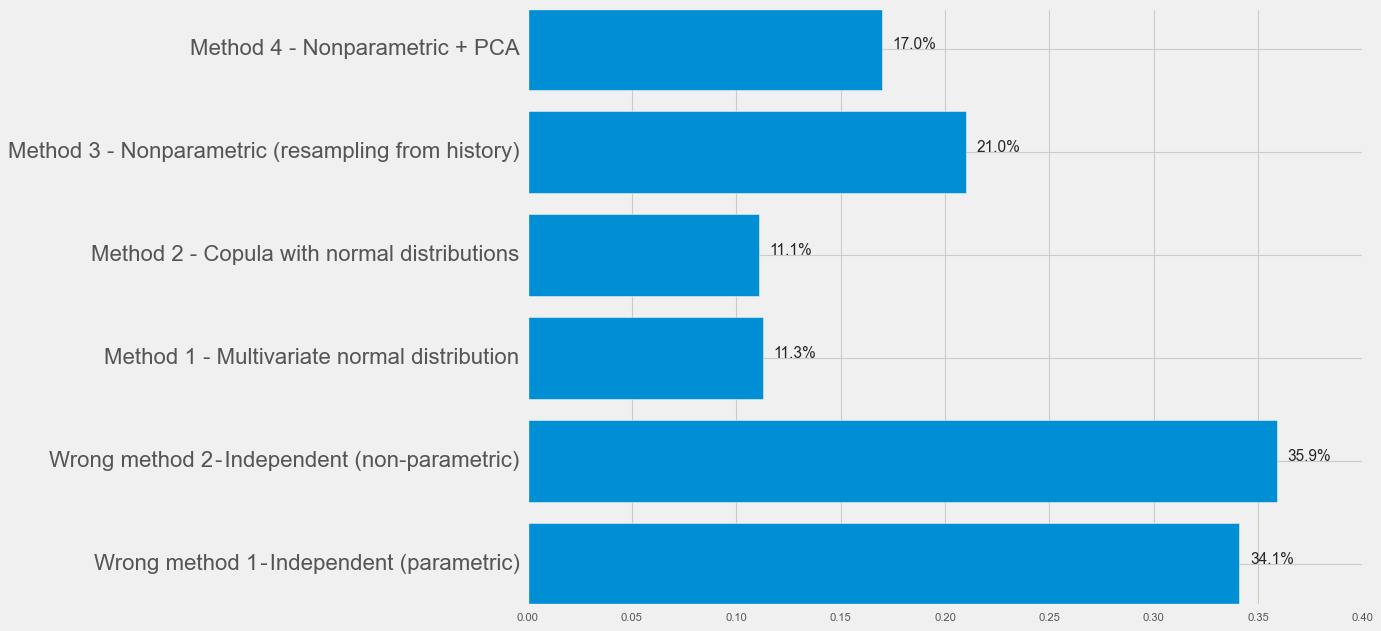

In [192]:
methods = [
    "Wrong method 1 - Independent (parametric)",
    "Wrong method 2 - Independent (non-parametric)",
    "Method 1 - Multivariate normal distribution",
    "Method 2 - Copula with normal distributions",
    "Method 3 - Nonparametric (resampling from history)",
    "Method 4 - Nonparametric + PCA"
]

results = [
    0.341,
    0.359,
    0.113,
    0.111,
    0.21,
    0.17
]

plt.style.use("fivethirtyeight")
plt.rc('ytick', labelsize=20) 

plt.figure(figsize=(12, 9))

plt.barh(y=methods, width=results)

for idx, result in enumerate(results):
    label = f"{round(result*100, 2)}%"
    plt.text(result+0.005, idx, label)

plt.show()

In [157]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']